# <CENTER> **Data Mining**
# <center> PROJECT 1 2019


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Data extraction
We extract the necessary columns from the dataset, insert a new column to indicate the month of each record and finally concatenate everything to form the new dataframe. Note that columns missing from the 2023 dataset were not included

In [26]:
import pandas as pd
import numpy as np


# Select the required columns
columns = ['id', 'host_id', 'host_name', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood_cleansed', 'bathrooms_text', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365', 'minimum_nights']

df = pd.read_csv('/content/gdrive/MyDrive/τεδε/data/2023/june/listings.csv',low_memory=False)
june_listings = df[columns]

june_listings.insert(0,'month','June')


###############################################

df = pd.read_csv('/content/gdrive/MyDrive/τεδε/data/2023/march/listings.csv',low_memory=False )
march_listings = df[columns]

march_listings.insert(0,'month','March')

################################################
df = pd.read_csv('/content/gdrive/MyDrive/τεδε/data/2023/september/listings.csv',low_memory=False)
september_listings = df[columns]

september_listings.insert(0,'month','September')

df = pd.concat( [ march_listings, june_listings, september_listings] , ignore_index=True )

# Write the DataFrame to a new csv file
df.to_csv('train_2023.csv', index=False)

print('Data combined successfully!')

Data combined successfully!


### Data Cleaning
Here we clean the data by filling in the missing values, cleaning and prepping the Price column for later work and finally storing the data in csv form. We opted to not remove the rows with Nan values, as they were quite many and the information lost would be significant. Instead, we filled in the number columns with the mean value of the column and string empty records to "Unknown"

In [27]:
# Count the number of rows with at least one missing value
missing_rows = df.isnull().any(axis=1).sum()

# Print the number of rows with at least one missing value
print('Rows with at least one missing value:', missing_rows)

Rows with at least one missing value: 12216


In [28]:
df = pd.read_csv('train_2023.csv',low_memory=False)

# Fill numerical columns with the mean
for col in df.select_dtypes(include=np.number).columns:
    #print('Filling missing values in %s with the mean: %.2f' % (col, df[col].mean()))
    df[col] = df[col].fillna(df[col].mean())

# Fill non-numerical columns with 'Unknown'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')

df['description'] = df['description'].replace('<.*?>', '', regex=True) # remove html tags

#Removing $ and some other symbols from the price column in order to plot the data for question 2.
df['price'] = df['price'].replace({'\$': ''}, regex=True)
df['price'] = df['price'].replace({'\.00': ''}, regex=True)
df['price'] = df['price'].replace({',': ''}, regex=True)
df['price'] = df['price'].astype(int)

# Count the number of rows with at least one missing value
missing_rows = df.isnull().any(axis=1).sum()

# Print the number of rows with at least one missing value
print('Rows with at least one missing value:', missing_rows)

# Save the DataFrame to a new csv file
df.to_csv('train_2023.csv', index=False)

print('Data saved successfully!')

Rows with at least one missing value: 0
Data saved successfully!


# **Question 1.1**
Most common room type

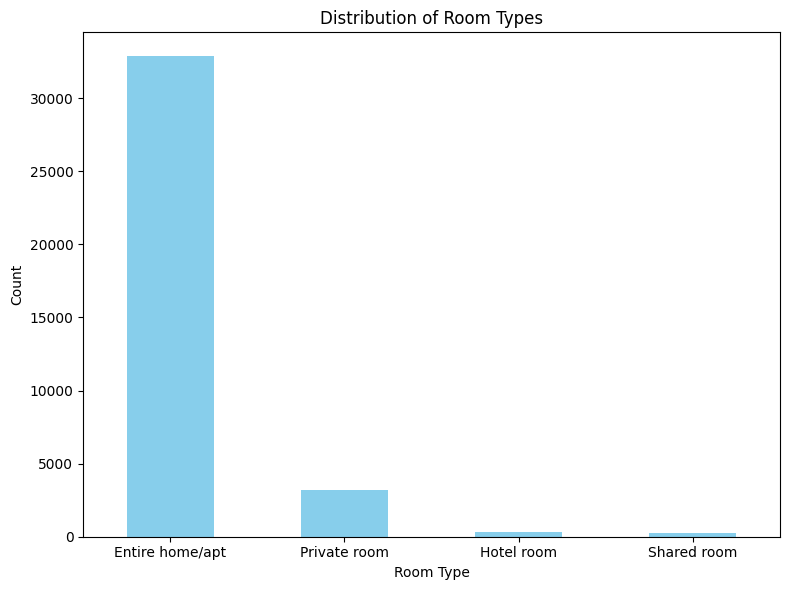

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('train_2023.csv')

# Get the counts of unique values in the 'room_type' column
room_type_counts = df['room_type'].value_counts()
# Plotting
plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# **Question 1.2**
Price per Month chart

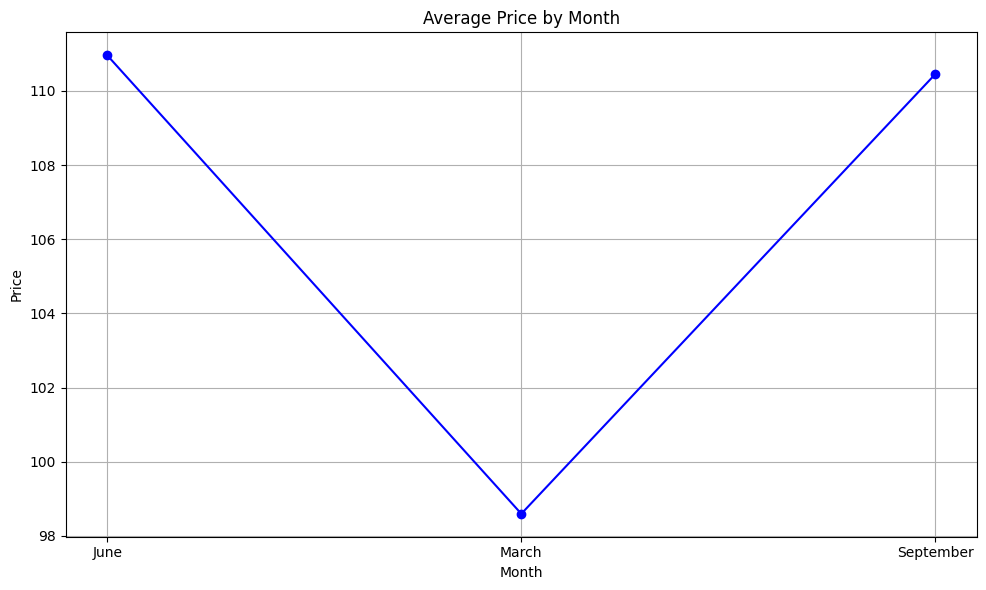

In [30]:
# Calculate mean price per month
mean_prices = df.groupby('month')['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mean_prices['month'], mean_prices['price'], marker='o', color='blue', linestyle='-')
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **Question 1.3**
The first 5 neighbourhoods with the most reviews

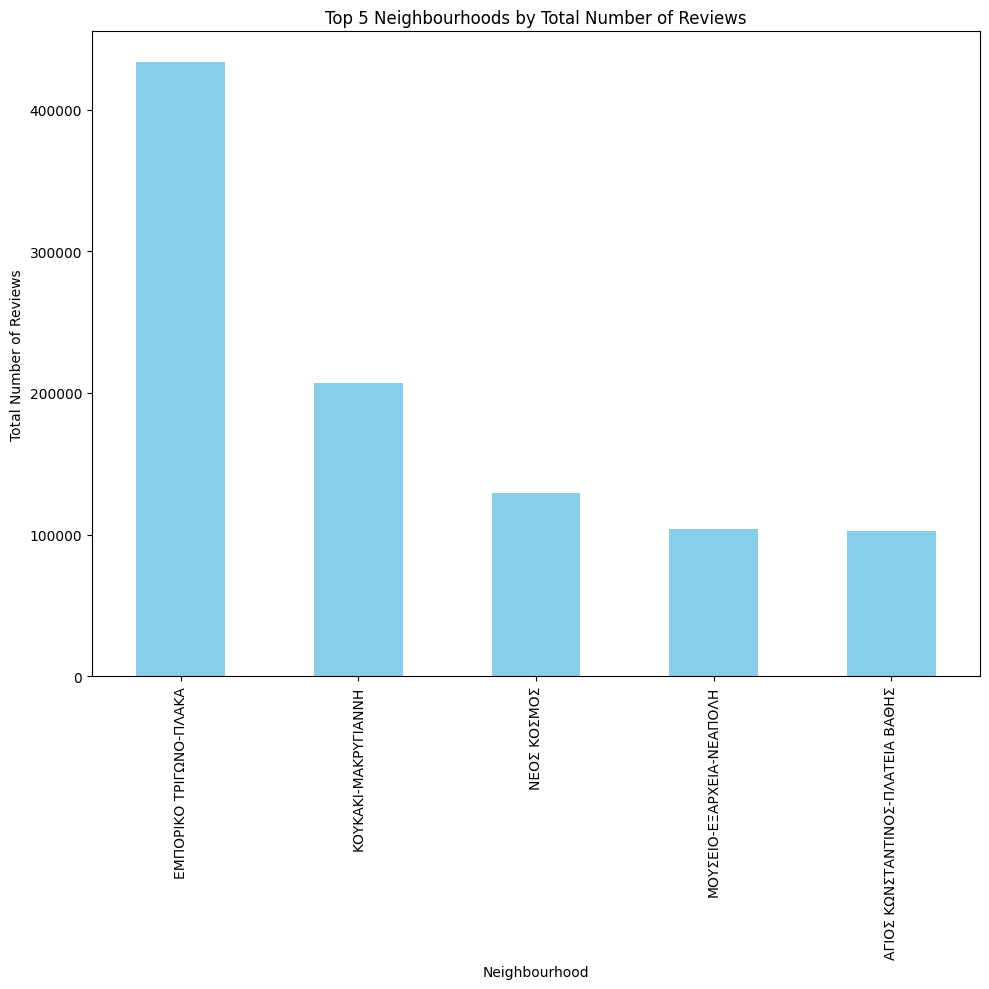

In [31]:
# Group the data by 'neighbourhood' and get the total number of reviews in each neighbourhood
neighbourhood_reviews = df.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()

# Sort the results in descending order and select the top 5 neighbourhoods
top_neighbourhoods = neighbourhood_reviews.sort_values(ascending=False).head(5)

# Create a bar plot of the total number of reviews in the top 5 neighbourhoods
plt.figure(figsize=(10, 10))
top_neighbourhoods.plot(kind='bar', color='skyblue')
plt.title('Top 5 Neighbourhoods by Total Number of Reviews')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# **Question 1.4**
Neighbourhood with the highest number of listings

In [32]:
# Group by neighbourhood and count listings
neighbourhood_counts = df['neighbourhood_cleansed'].value_counts()

# Find the neighbourhood with the maximum listings
max_neighbourhood = neighbourhood_counts.idxmax()

print('Neighbourhood with the maximum listings:', max_neighbourhood)

Neighbourhood with the maximum listings: ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ


# **Question 1.5**
Number of listings per Neighbourhood and per Month

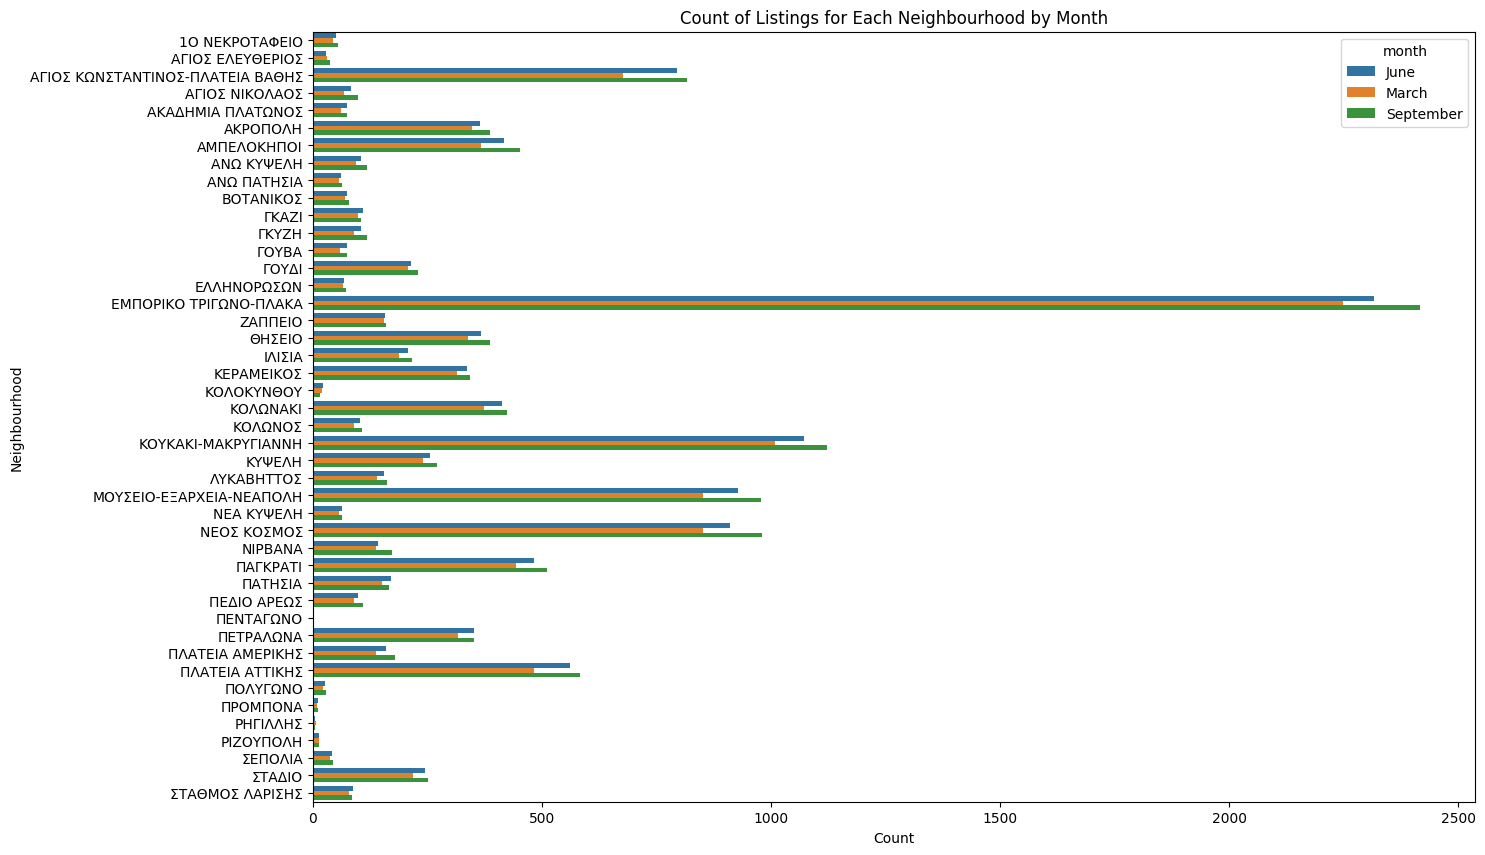

In [33]:
# Count the number of listings for each neighborhood-month combination
counts = df.groupby(['month', 'neighbourhood_cleansed']).size().reset_index(name='count')

# Create a larger bar plot of the count of listings for each neighbourhood
plt.figure(figsize=(15, 10))  # Increase the size of the plot
sns.barplot(x='count', y='neighbourhood_cleansed', hue='month', data=counts, orient='h')
plt.title('Count of Listings for Each Neighbourhood by Month')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()

# **Question 1.6**
Neighbourhood column histogram

<BarContainer object of 44 artists>

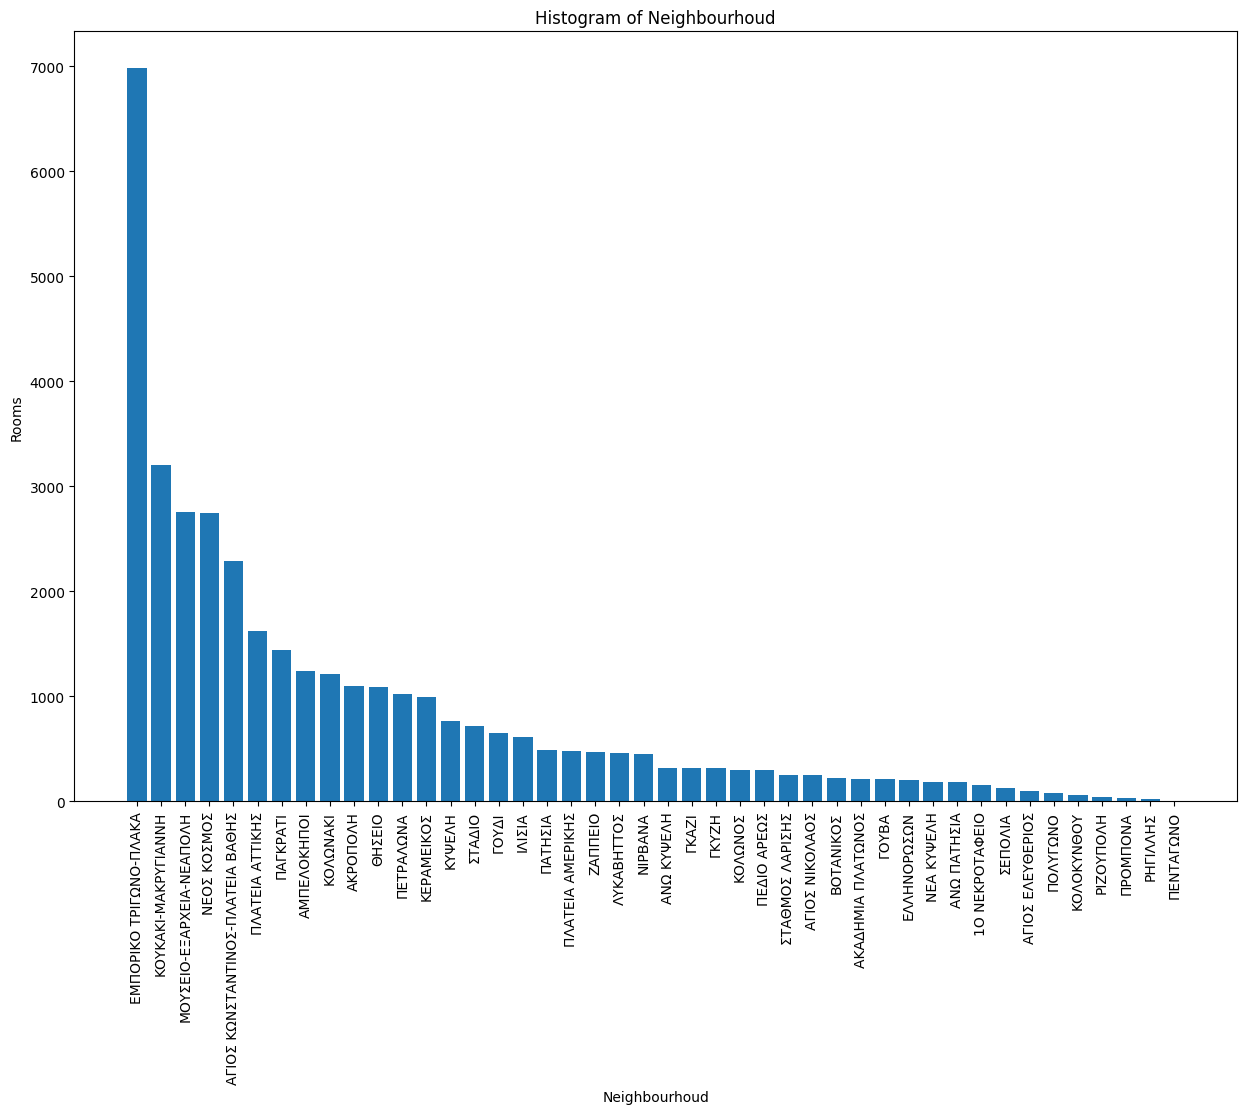

In [34]:
#Hood_counts is the dataframe of neighbourhood and the counts of unique ids for each neighbourhood. This dataframe was created in Question 5.
# Convert the Series to a DataFrame
neighbourhood_counts_df = pd.DataFrame(neighbourhood_counts)

# Reset index to make 'neighbourhood' a column
neighbourhood_counts_df.reset_index(inplace=True)

# Rename the columns to appropriate names
neighbourhood_counts_df.columns = ['neighbourhood_cleansed', 'counts']

#Here we create a dictionary of the neighbourhoods and their counts and we use plt.bar() to print them in a histogram format.
neighbourhood_counts_df.set_index('neighbourhood_cleansed')['counts'].to_dict()
mydict = dict(zip(neighbourhood_counts_df.neighbourhood_cleansed, neighbourhood_counts_df.counts))
plt.figure(figsize=(15,10))
plt.title('Histogram of Neighbourhoud')
plt.xlabel('Neighbourhoud')
plt.ylabel('Rooms')
plt.xticks(rotation=90)
plt.bar(mydict.keys(), mydict.values())

# **Question 1.7**
Most common room type per Neighbourhood

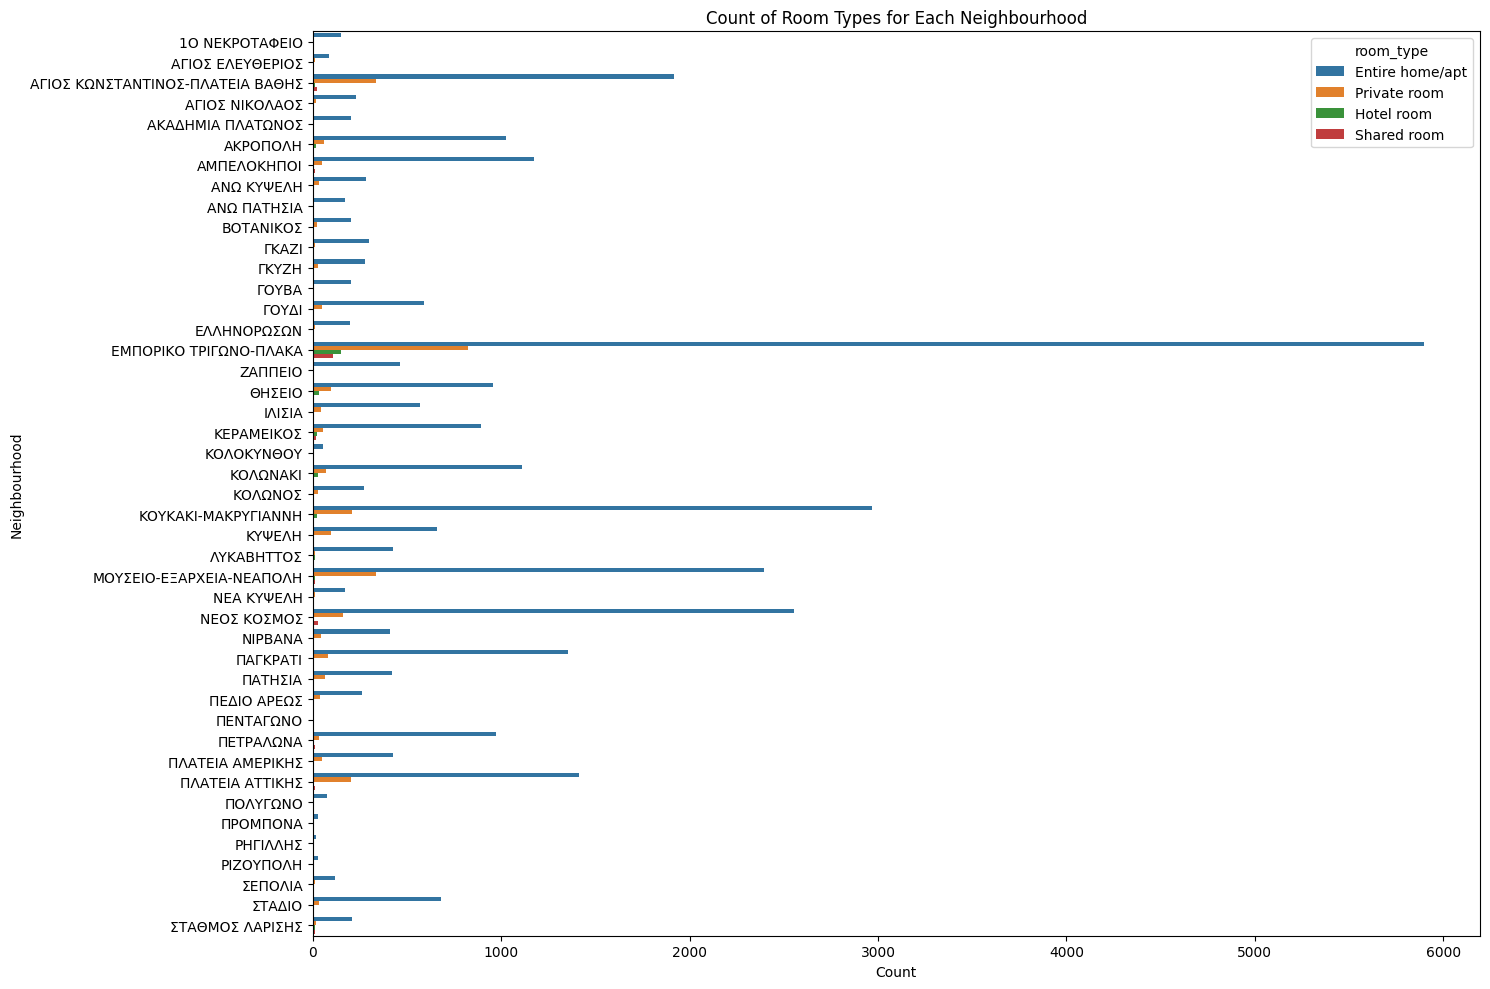

In [35]:
# Group by 'neighbourhood' and 'room_type' and count the number of occurrences
room_type_counts = df.groupby(['neighbourhood_cleansed', 'room_type']).size().reset_index(name='count')

# Create a larger bar plot of the count of room types for each neighbourhood
plt.figure(figsize=(15, 10))  # Increase the size of the plot
sns.barplot(x='count', y='neighbourhood_cleansed', hue='room_type', data=room_type_counts)
plt.title('Count of Room Types for Each Neighbourhood')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.tight_layout()
plt.show()

# **Question 1.8**
Most expensive room type

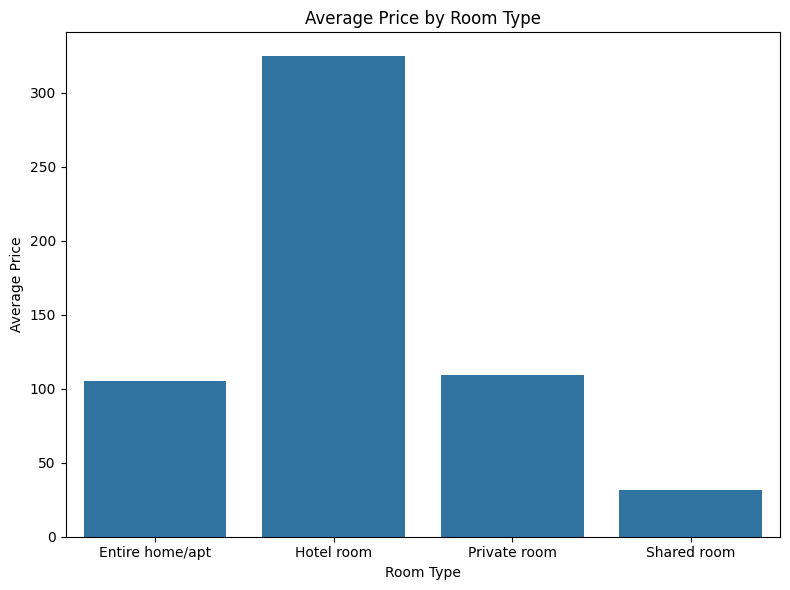

In [36]:
#Calculate the average price for each room type
average_price = df.groupby('room_type')['price'].mean()

# Convert the average_price Series to a DataFrame and reset the index
average_price_df = average_price.reset_index()
average_price_df.columns = ['room_type', 'average_price']

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='average_price', data=average_price_df)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# **Question 1.10**
Creating wordclouds for the Neighbourhood, Description and Reviews columns of the dataset (Transit column is missing from the 2023 dataset)

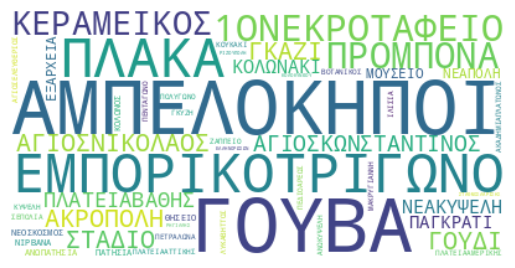

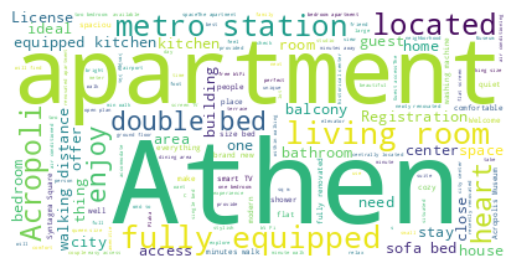

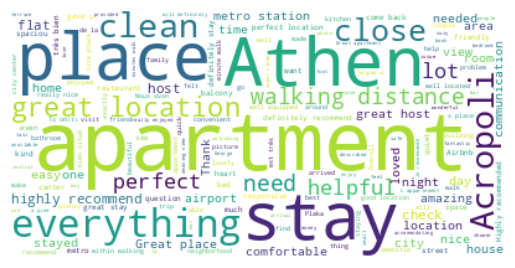

In [37]:
from wordcloud import WordCloud

df = pd.read_csv('train_2023.csv')

#Getting a unique list of 'neighbourhood' column so it can be passed to WordCloud().generate()
hood_list = df['neighbourhood_cleansed'].str.replace(" ","").drop_duplicates()
unique_str  = ' '.join(hood_list)
wordcloud = WordCloud(background_color="white").generate(unique_str)

#Displaying the image of 'neighbourhood':
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#Same thing for 'description' column
desc_list = df['description'].drop_duplicates()
unique_str3  = ' '.join(desc_list)
wordcloud = WordCloud(background_color="white").generate(unique_str3)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


df = pd.read_csv('/content/gdrive/MyDrive/τεδε/data/2023/june/reviews.csv',low_memory=False)
june_listings = df['comments'].replace('<.*?>', '', regex=True)

df = pd.read_csv('/content/gdrive/MyDrive/τεδε/data/2023/march/reviews.csv',low_memory=False )
march_listings = df['comments'].replace('<.*?>', '', regex=True)

df = pd.read_csv('/content/gdrive/MyDrive/τεδε/data/2023/september/reviews.csv',low_memory=False)
september_listings = df['comments'].replace('<.*?>', '', regex=True)

df = pd.concat( [june_listings, march_listings, september_listings] , ignore_index=True )

all_comments = df.drop_duplicates().dropna()

# Join all comments into a single string with each comment separated by a space
all_comments_str = ' '.join(all_comments)

wordcloud = WordCloud(background_color="white").generate(all_comments_str)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Question 1.11**
In this section we make use of the Amenities column of the dataset. Because in the 2023 dataset this column is a lot more unstable in comparison to the 2019 model, we had to make some changes. In this case, every amenitie is included in the dictionary in the exact same way, using double quotes "". However, here almost every amenitie value in the column is different with one another. The end result of this is many strings in many records referring to the same amenitie in different words. We tackled this in a simple and generally effective way. For every amenitie found in the column, we search the dictionary to find a word that can match that. If we can, we replace the entire amenitie string with the group of the matched word. This can cause some mistakes, for example if the string in question has a word that is contained in two groups, however these cases were very few and with meticulous categorization of the groups, we avoided most mistakes. In this version we also expanded the groups a lot to include many new amenities not found in the 2019 model.

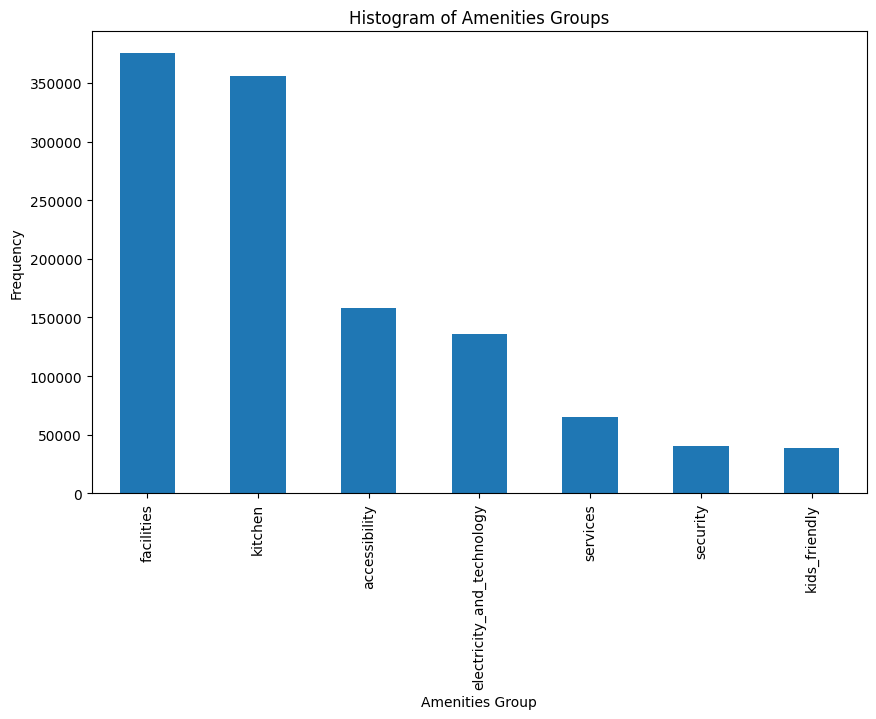

In [38]:
df = pd.read_csv('train_2023.csv')

# Define the groups
amenities_groups = {
    'kitchen': [ '"Kitchen"', '"Microwave"', '"Coffee maker"', '"Refrigerator"',  '"Dishwasher"', '"Dishes and silverware"', '"Cooking basics"', '"Oven"', '"Stove"', '"Breakfast"',
                '"Full kitchen"','"Convection oven"', '"Hot water kettle"', '"Mini fridge"', '"Breakfast table"', '"Espresso machine"', '"Formal dining area"',
                '"Double oven"', 'Kitchenette', '"Steam oven"','"Gas oven"', '"Freezer"', '"Toaster"', '"Barbecue"', '"Baking"', '"Blender"'  ],
    'accessibility': [ '"Elevator"', '"24-hour check-in"', '"Wide doorway"', '"Step-free access"', '"Wide clearance to bed"', '"Free street parking"', '"Accessible-height bed"',
                       '"Wide hallway clearance"','"Flat path to front door"', '"Wide entryway"', '"Accessible-height toilet"', '"Outdoor parking"', '"Ground floor access"',
                       '"Wide clearance to shower toilet"', '"Wheelchair accessible"', '"Stair gates"', '"Disabled parking spot"', '"Wide clearance to shower, toilet"',
                        '"Paid parking on premises"', '"Free parking on premises"', '"Paid parking off premises"', '"Fixed grab bars for toilet"' ],
    'electricity_and_technology': ['"TV"', '"Cable TV"', '"Internet"', '"Wifi"', '"Buzzer/wireless intercom"', '"Laptop friendly workspace"', '"Ethernet connection"', '"Pocket wifi"',
                                   '"Game console"', '"DVD player"', '"EV charger"', '"Smart TV"', '"Sound system"', '"High-resolution computer monitor"',
                                   '"Printer"', '"Netflix"', '"Fax machine"', '"Air purifier"', '"Projector and screen"', '"Amazon Echo"', '"HBO GO"', "HDTV" , '"Chromecast"',
                                    '"Pioneer"', '"Nintendo"', '"Kenwood"', '"Sony"', '"PS5"', '"Disney+"' ],
    'facilities': [ '"Air conditioning"', '"Heating"', '"Washer"', '"Dryer"', '"First aid kit"', '"Essentials"', '"Shampoo"', '"Hangers"', '"Hair dryer"', '"Iron"', '"Hot water"', '"Bed linens"',
                    '"Extra pillows and blankets"', '"Patio or balcony"', '"Bathtub"', '"Handheld shower head"', '"Indoor fireplace"', '"Private living room"',
                    '"Single level home"', '"Hot tub"', '"Washer / Dryer"', '"Garden or backyard"', '"Body soap"', '"Bath towel"', '"Toilet paper"', '"Fire pit"',
                    '"Walk-in shower"', '"Bedroom comforts"', '"Bathroom essentials"', '"Beach essentials"', '"Changing table"', '"Firm mattress"', '"Fixed grab bars for shower"',
                    '"Rain shower"', '"Terrace"','"Balcony"', '"Memory foam mattress"',  '"Murphy bed"', '"Outdoor seating"', '"Bathtub with bath chair"', '"Roll-in shower"',
                    '"Pool"', '"Shower chair"',  '"Gym"', '"Soaking tub"', '"En suite bathroom"', '"Mountain view"', '"Exercise equipment"',
                    '"Pillow-top mattress"', '"Waterfront"', '"Beachfront"', '"Ceiling fan"', '"Heated towel rack"', '"Ski-in/Ski-out"', '"Bidet"', '"Wine cooler"', '"Mudroom"',
                    '"Central air conditioning"', '"Day bed"', '"Standing valet"',  '"Stand alone steam shower"',  '"Jetted tub"', '"Alfresco bathtub"', '"Private bathroom"',
                    '"Electric profiling bed"', '"Shared gym"', '"Sun loungers"', '"Touchless faucets"', 'Sauna', '"Warming drawer"', '"Hammock"', '"Private pool"', '"Heat lamps"',
                    '"Ironing Board"', '"Heated floors"', '"Private hot tub"', '"Beach view"', '"Lake access"', '"Conditioner"', '"Laundromat"', '"Storage"','"Piano"', '"Heater"',
                    '"Closet"', '"Wardrobe"', '"Treadmill"', '"Dresser"', '"Korres"', '"Johnson\'s"', '"Apivita"', '"Papoutsanis"', '"Kayak"', '"Elvive"', '"Bikes"', '"Pantene"', '"Dove"',
                     '"Mosquito"', '"Fans"', '"Nespresso"', '"Sink"', '"Yoga"' ],
    'kids_friendly': ['"Family/kid friendly"', '"High chair"', '"Pack ’n Play/travel crib"', '"Room-darkening shades"', '"Children’s books and toys"','"Crib"',
                      '"BBQ grill"', '"Children’s dinnerware"', '"Outlet covers"', '"Baby bath"', '"Babysitter recommendations"', '"Table corner guards"', '"Fireplace guards"', '"Safe"',
                      '"Baby monitor"'],
    'security': [ '"Safety card"', '"Fire extinguisher"', '"Smoke detector"', '"Carbon monoxide detector"', '"Lock on bedroom door"',  '"Lockbox"','"Well-lit path to entrance"',
                  '"Doorman"', '"Entrance"', '"Window guards"', '"Keypad"', '"Smart lock"'],
    'services': [ '"Luggage dropoff allowed"', '"Host greets you"', '"Long term stays allowed"', '"Cleaning before checkout"', '"Smoking allowed"',
                 '"Self check-in"', '"Pets allowed"', '"Building staff"', '"Pets live on this property"', '"Dog(s)"', '"Suitable for events"', '"Cat(s)"', '"Other pet(s)"'],
}

#make everything lowercase
df['amenities'] = df['amenities'].str.lower()

#make the group strings lowercase and remove double quotes
for group, words in amenities_groups.items():
    amenities_groups[group] = [word.lower().strip('"') for word in words]

# Define the function to apply
def replace_with_group(s):
    s = s.replace('"', '').replace('[', '').replace(']', '').split(', ')  # Remove double quotes and brackets, then split into a list of amenities
    new_s = []
    for amenity in s:
        amenity_words = amenity.split()  # Split the amenity into individual words
        for group, words in amenities_groups.items():
            group_words = [word.split() for word in words]  # Split each word in the group into individual words
            if any(word in amenity_words for word_list in group_words for word in word_list):
                new_s.append(group)
                break
    return new_s

# Apply the function to the 'amenities' column
df['amenities'] = df['amenities'].apply(replace_with_group)

# Flatten the list of amenities and count the frequency of each group
amenities_count = df['amenities'].explode().value_counts()

# Plot the histogram
plt.figure(figsize=(10,6))
amenities_count.plot(kind='bar')
plt.title('Histogram of Amenities Groups')
plt.xlabel('Amenities Group')
plt.ylabel('Frequency')
plt.show()

# **Question 1.12**
A) Average price per Neighbourhood

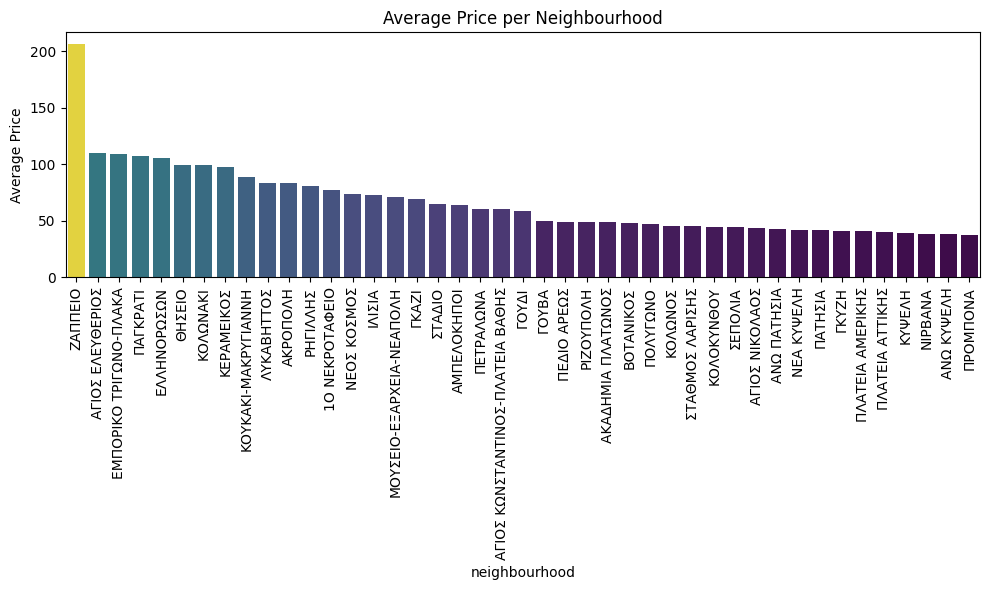

In [39]:
df = pd.read_csv('train_2023.csv')

filtered_df = df[df['accommodates'] == 2]
#Calculate the average price for each room type
average_price = filtered_df.groupby('neighbourhood_cleansed')['price'].mean()

# Convert the average_price Series to a DataFrame and reset the index
average_price_df = average_price.reset_index()
average_price_df.columns = ['neighbourhood_cleansed', 'average_price']

# Sort the DataFrame by average price in descending order
average_price_df = average_price_df.sort_values(by='average_price', ascending=False)
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_cleansed', y='average_price',hue='average_price', data=average_price_df, palette='viridis',legend=False)
plt.title('Average Price per Neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

B) Neighbourhood classification into 3 categories based on the average price

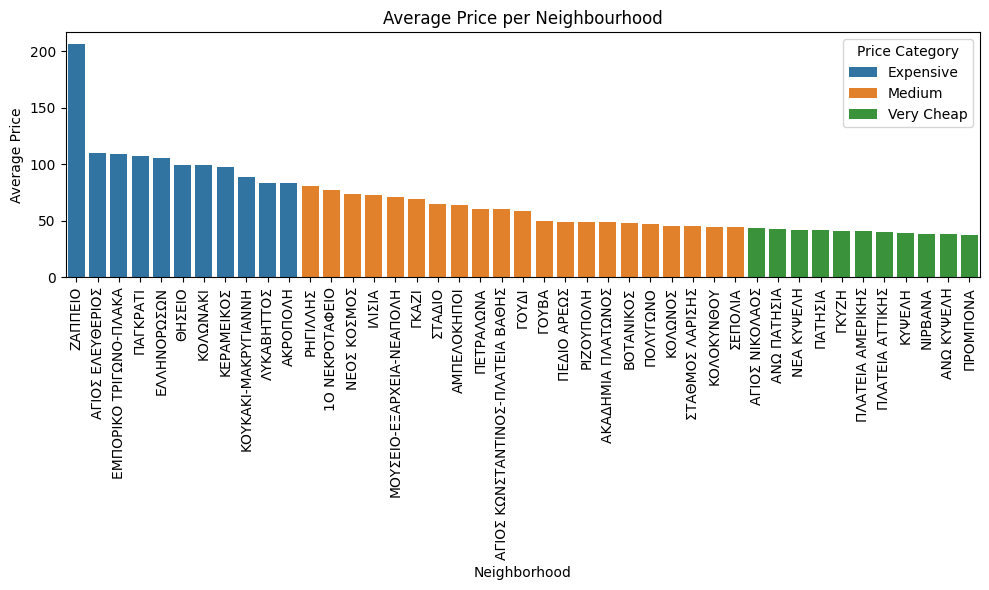

In [40]:
# Define the quartiles to categorize the neighborhoods
very_cheap_threshold = average_price_df['average_price'].quantile(0.25)
expensive_threshold = average_price_df['average_price'].quantile(0.75)

# Function to categorize neighborhoods
def categorize_neighborhood(price):
    if price <= very_cheap_threshold:
        return 'Very Cheap'
    elif price <= expensive_threshold:
        return 'Medium'
    else:
        return 'Expensive'

# Apply the function to create a new column for neighborhood categories
average_price_df['price_category'] = average_price_df['average_price'].apply(categorize_neighborhood)

# Plotting with neighborhood categories
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_cleansed', y='average_price', hue='price_category', data=average_price_df)
plt.title('Average Price per Neighbourhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.gca().legend(title='Price Category')
plt.show()

# **Question 1.13**
A) 5 neighbourhoods with least reviews

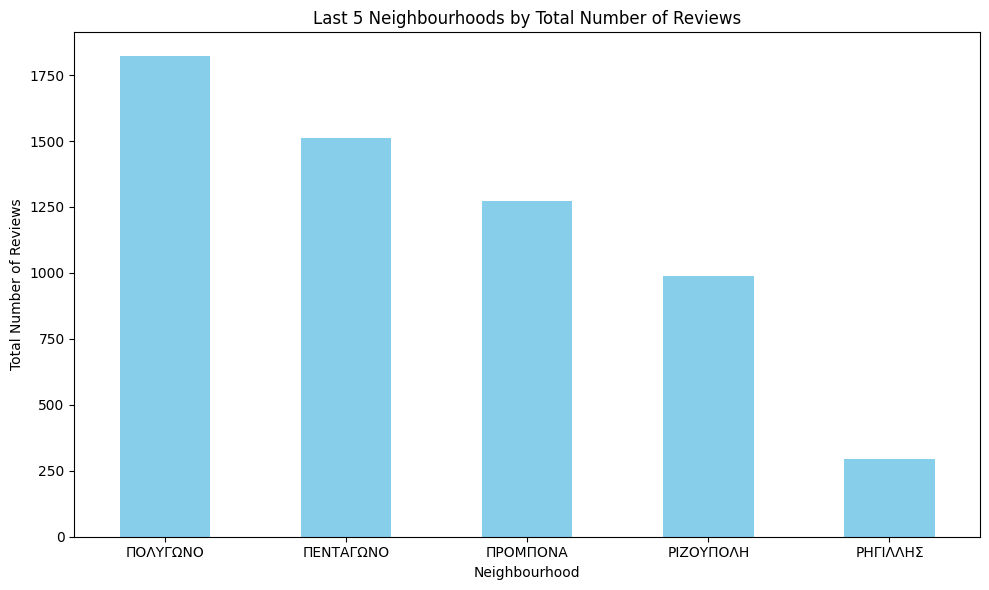

In [41]:
# Group the data by 'neighbourhood' and get the total number of reviews in each neighbourhood
neighbourhood_reviews = df.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()

# Sort the results in descending order and select the top 5 neighbourhoods
top_neighbourhoods = neighbourhood_reviews.sort_values(ascending=False).tail(5)

# Create a bar plot of the total number of reviews in the top 5 neighbourhoods
plt.figure(figsize=(10, 6))
top_neighbourhoods.plot(kind='bar', color='skyblue')
plt.title('Last 5 Neighbourhoods by Total Number of Reviews')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

B) top 5 apartments with most bedrooms

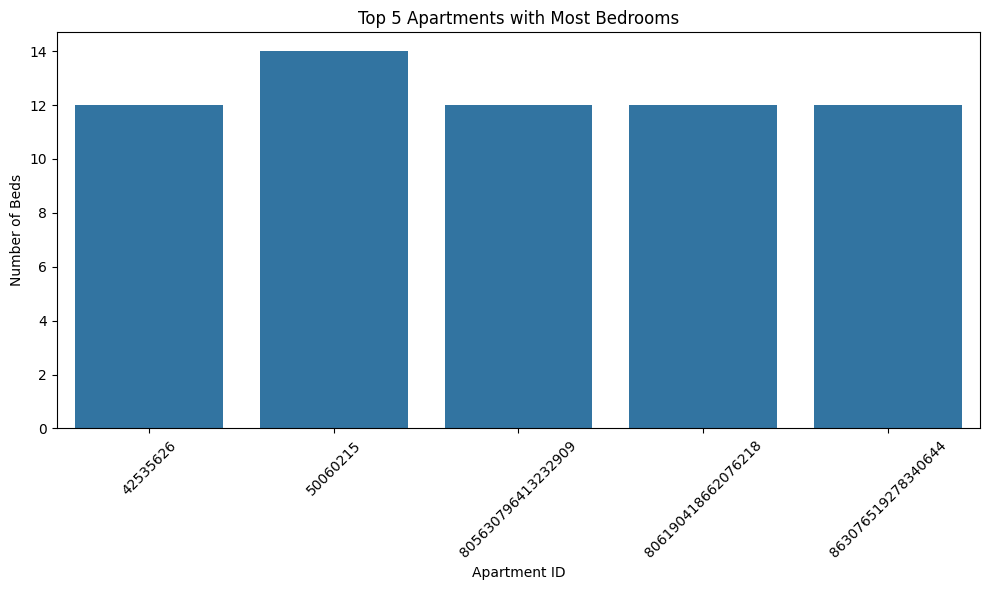

In [43]:
# Group by apartment_id and aggregate the maximum number of beds for each apartment
apartment_max_beds = df.groupby('id')['bedrooms'].max()

# Sort the apartments by the maximum number of beds in descending order
sorted_apartments = apartment_max_beds.sort_values(ascending=False)

# Select the top 5 apartments with the most beds
top_5_apartments = sorted_apartments.head(5)

# Filter the train DataFrame to include only the top 5 apartments
top_5_apartments_data = df[df['id'].isin(top_5_apartments.index)]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='id', y='bedrooms', data=top_5_apartments_data, errorbar=None)
plt.title('Top 5 Apartments with Most Bedrooms')
plt.xlabel('Apartment ID')
plt.ylabel('Number of Beds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C) Count of Instant Bookable (True) Listings by Neighborhood

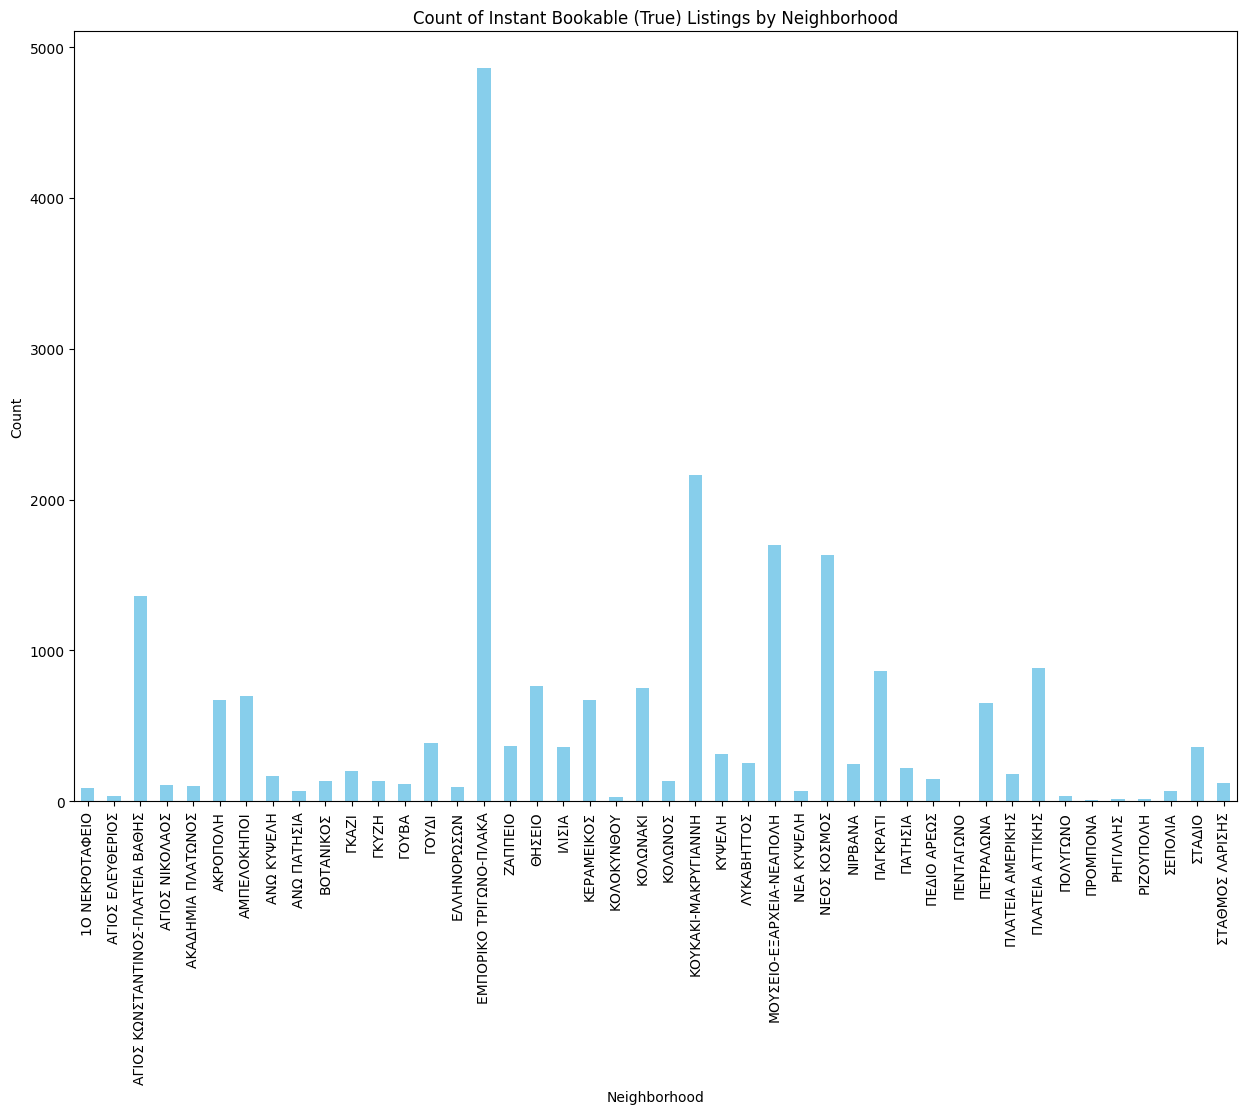

In [44]:
# Group by neighborhood and count instant bookable listings where True
neighborhood_counts = df[df['instant_bookable'] == 't'].groupby('neighbourhood_cleansed').size()

# Plotting
plt.figure(figsize=(15,10))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Instant Bookable (True) Listings by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# **Question 1.14**
Hosts with the highest number of listings

In [45]:
df = pd.read_csv('train_2023.csv')
# Count the number of houses each host has
host_counts = df['host_id'].value_counts()

# Create a mapping of host IDs to host names
host_names = df.drop_duplicates('host_id').set_index('host_id')['host_name']

# Get the top 10 hosts with the most houses
top_hosts = host_counts.head(10)

# Map the host IDs of the top hosts to their names
top_host_names = top_hosts.index.map(host_names)

# Create a DataFrame with the top hosts' names and the number of houses they have
top_hosts_df = pd.DataFrame({'Host Name': top_host_names, 'Number of Houses': top_hosts.values})

# Display the table
print(top_hosts_df)

     Host Name  Number of Houses
0     Upstreet               333
1          Mgv               229
2  Evan&Anetta               223
3       George               212
4       Homm ®               203
5   Tia & Mike               173
6          Tèo               166
7     Maryland               161
8        Harry               154
9  Bill & John               152


# **Question 1.15**
Αν και το αρχειο του έτος 2019 περιέχει δεδομένα διαφορετικών μηνών σε σχέση με το 2023, μπορούμε να βγάλουμε κάποια ενδεικτικά αποτελέσματα.

Αναμφισβήτητα και στις 2 χρονιές η περιοχή με τα περισσότερα καταλύματα είναι η Πλάκα,  στην οποία παρατηρούμε περίπου διπλάσια ακίνητα το 2023 σε σχέση με το 2019, ενώ τόσο στην Πλάκα όσο και στις υπόλοιπες γειτονιές οι τιμές έχουν σχεδόν διπλασιαστεί το έτος 2023 συγκριτικά με το 2019.

Παρατηρούμε επίσης περισσότερες γειτονιές με καταλύματα το 2023 γεγονός που δικαιολογεί τόσο την αύξηση των ακινήτων όσο και την μεγάλη αύξηση των τιμών.

Όσoν αφορά τον τύπο δωματίου παρατηρούμε με διαφορά το πιο συχνό το : Entire home, ωστόσο το 2023 έχει προστεθεί ένας νέος τύπος δωματίου το Hotel room, ο οποίος έχει μεγαλύτερο μέσο όρο σχετικά με τους άλλους τύπους δωματίων, κυρίως εξαιτίας μερικών δωματίων με τεράστια τιμή η οποία εκτοξεύει τον μέσο όρο αρκετά πάνω σε σχέση με τους υπόλοιπους τύπους δωματίου. Ακόμη και αν εξαιρέσουμε αυτά τα δωμάτια, οι τιμές των ξενοδοχειακών δωματίων είναι και πάλι πιο υψηλές ωστόσο από οποιαδήποτε άλλη κατηγορία.

Επίσης, παρατηρείται και στις δύο εξεταζόμενες χρονιές μια εμφανής εστίαση των μισθωτών προς την παροχή υπηρεσιών τύπου  facilities, το οποίο περιέχει και τις περισσότερες καταχωρήσεις και το οποίο είναι λογικό, δεδομένου οτι εκεί βρίσκονται οι περισσότερες παροχές τις οποίες αποζητάει ο μεγαλύτερος αριθμός επισκεπτών, σε αντίθεση με τις παροχές ασφαλείας η παιδικής ασφάλειας και φιλικότητας.

Επιπροσθέτως, μπορούμε ευδιάκριτα να παρατηρήσουμε οτι ο τύπος διαμεριζόμενου δωματίου (shared room) δεν προτιμάται από τους επισκέπτες, οι οποίοι σε συντριπτικό βαθμό επιλέγουν να διαμείνουν σε ολόκληρα διαμερίσματα και σπανιότερα σε ιδιωτικά δωμάτια.

Τέλος, κεντρικό ρόλο στα κριτήρια της διαμονής αλλά και της τιμής, τα οποία είναι και αλληλένδετα, είναι το τουριστικό ενδιαφέρον του σημείου όπου βρίσκεται το δωμάτιο. Λέξεις όπως η "Ακρόπολη" παίζουν κεντρικό ρόλο σε όλες τις περιγραφές και το οποίο είναι λογικό, αφού περισσότεροι επισκέπτες της Αθήνας έρχονται για αυτό το ιστορικό μνημείο.

# **PART 2**

In this section we will create a recommendation system based on the TF-IDF matrix of unigrams and bigrams from the Name and Description columns of the dataset. Firstly we remove the duplicate id's, remove the stopwords and finally create the new dataframe and the wordcloud of the Description column

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


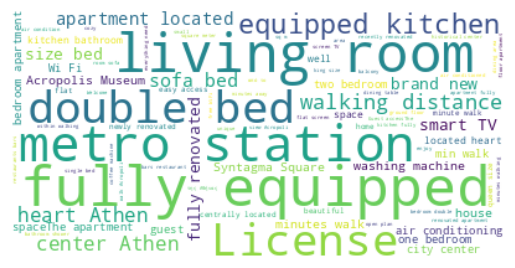

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Load the cleaned data
df = pd.read_csv('train_2023.csv')

# Assuming your data is stored in a DataFrame called 'df'
# and the ID column is named 'id'

# Drop duplicates based on the 'id' column
df = df.drop_duplicates(subset='id')

# Reset the index after removing duplicates
df = df.reset_index(drop=True)


# Download the stopwords from NLTK
nltk.download('stopwords')

# Define the stopwords to remove
stopwords = set(stopwords.words('english'))

# Remove the stopwords from the 'description' column
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

wordcloud = WordCloud(background_color="white").generate(df['description'].str.cat(sep=' '))

#Displaying the image of 'neighbourhood':
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

df['concatenated'] = df['name'] + ' ' + df['description']

Here, we create the Vectorizer, construct the matrix, find the cosine similarity matrix and find the 100 most similar house pairs, which we store in a dictionary

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

# Fill missing values in the 'description' column with an empty string
df['concatenated'] = df['concatenated'].fillna('NULL')


############## 1 ################
# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df['concatenated'])

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

################################

############## 2 ################

# To get the 100 most similar houses, we need to calculate the cosine similarity of the upper triangle of the matrix
# Since this way every house will be compared with every other house only once and at the end we will keep the 100 most similar pairs

# Get the indices of the upper triangle of the cosine similarity matrix
upper_triangle_indices = np.triu_indices(cosine_sim.shape[0], k=1)

# Get the cosine similarity scores for the upper triangle
upper_triangle_scores = cosine_sim[upper_triangle_indices]

# Get the indices of the 100 most similar scores
top_100_indices = np.argpartition(upper_triangle_scores, -100)[-100:]

# Get the corresponding pairs of house indices
top_100_pairs = np.column_stack((upper_triangle_indices[0][top_100_indices], upper_triangle_indices[1][top_100_indices]))

# Create a dictionary of similar houses
similar_houses = {df['id'].iloc[pair[0]]: df['id'].iloc[pair[1]] for pair in top_100_pairs}
#print(similar_houses)

Defining the recommendation function, that takes a listing id as input and the number of most similar houses to return

In [48]:
############## 3 ################
def get_similar_houses(house_id, n):
    # Get the index of the house in the dataframe
    house_index = df[df['id'] == house_id].index[0]

    # Get the indices and scores of the n+1 most similar houses
    similar_house_indices = np.argpartition(cosine_sim[house_index], -n-1)[-n-1:]

    # Remove the house itself from the indices
    similar_house_indices = similar_house_indices[similar_house_indices != house_index]

    # Get the scores of the n most similar houses
    similar_house_scores = cosine_sim[house_index][similar_house_indices]

    # Get the IDs and descriptions of the n most similar houses
    similar_house_ids = df['id'].iloc[similar_house_indices].values
    similar_house_descriptions = df['concatenated'].iloc[similar_house_indices].values

    # Combine the IDs, descriptions, and scores into a list of tuples
    similar_houses = list(zip(similar_house_ids, similar_house_descriptions, similar_house_scores))

    # Sort the list by the scores in descending order
    similar_houses.sort(key=lambda x: x[2], reverse=True)

    print(f"Recommending {n} listings similar to {df[df['id'] == house_id]['name'].values[0]}:")
    print("-----------------------------------------")
    for i in range(n):
        print(f"Listing ID: {similar_houses[i][0]}")
        print(f"Description: {similar_houses[i][1]}")
        print(f"Similarity Score: {similar_houses[i][2]:.2f}")
        print("-----------------------------------------")


    return

In [49]:
get_similar_houses(695173, 5)

Recommending 5 listings similar to Unique Central Artistic Flat Athens:
-----------------------------------------
Listing ID: 948255721011498239
Description: Rental unit in Athina · ★5.0 · 1 bedroom · 1 bed · 1 bath A unique luxurious 1st floor apartment heart Athens , next Sygrou-Fix metro station one metro-stop away Acropolis. Located Koukaki-Neos Kosmos area famous airbnb area Athens . The apartment ideal 4 guests.Registration number00002251088
Similarity Score: 0.13
-----------------------------------------
Listing ID: 793242316599066959
Description: Sygrou-Fix metro st. 1 bedroom 4 pers. apartment Bright, fully furnished apartment located heart Athens, 350 meters metro station Sygrou - fix . The apartment 1 double bed , spacious livingroom one sofa bed ,kitchen bathroom. Close everything see visit Athens, easy accesible public transsport. Ideal vacation business trips family friends.License number00001759632
Similarity Score: 0.12
-----------------------------------------
Listing 

Printing the 10 most common bigrams among the words in the new column

In [50]:
############## 4 ################

import nltk
nltk.download('punkt')
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

df['concatenated'] = df['concatenated'].str.replace('[^\w\s]', '', regex=True)

# Concatenate all the text in the 'concatenated' column into one string
text = ' '.join(df['concatenated'])

# Tokenize the text into words
words = nltk.word_tokenize(text)

# Use the BigramCollocationFinder to find bigrams
bigram_finder = BigramCollocationFinder.from_words(words)

# Get the 10 most common bigrams
common_bigrams = bigram_finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)

for bigram in common_bigrams:
    print(bigram)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


('living', 'room')
('fully', 'equipped')
('Rental', 'unit')
('in', 'Athina')
('unit', 'in')
('walking', 'distance')
('1', 'bath')
('metro', 'station')
('double', 'bed')
('Athina', 'New')
